# Feature selection methods

## Filter feature selection methods(Chi-Squared test , information gain ,correlation coefficient scores)

In [5]:
from sklearn.feature_selection import VarianceThreshold
X = [
      [0, 0, 1],
      [0, 1, 0],
      [1, 0, 0], 
      [0, 1, 1],
      [0, 1, 0],
      [0, 1, 1]
]
sel = VarianceThreshold(threshold=0.1)
sel.fit(X)
sel.transform(X)
sel.get_support()

array([ True,  True,  True])

In [14]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2, f_regression, mutual_info_regression

features, labels = load_iris(return_X_y=True)

print(features.shape)
chi2(features, labels)
f_regression(features, labels)
mutual_info_regression(features, labels)
features_new = SelectKBest(chi2, k=1).fit_transform(features, labels)
features_new2 = SelectKBest(f_regression, k=1).fit_transform(features, labels)
features_new3 = SelectKBest(mutual_info_regression, k=1).fit_transform(features, labels)
print(features_new.shape)
print(features_new2.shape)
print(features_new3.shape)

(150, 4)
(150, 1)
(150, 1)
(150, 1)


## Wrapper feature selection methods (forward , backward ,recursive )

In [15]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
model = SequentialFeatureSelector(
    knn,n_features_to_select=2,
    direction= 'backward')
model.fit(features, labels)
model.get_support()

array([False, False,  True,  True])

## Embedded feature selection methods (LASSO ,Elastic Net ,RIDGE regression)

In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3)
LModel = Lasso(alpha=0.1)
LModel.fit(features_train, labels_train)
pridection = LModel.predict(features_test)

acc = r2_score(labels_test, pridection)
acc

0.8743742314985349

In [23]:
from sklearn.linear_model import ElasticNet
enModel = ElasticNet()
enModel.fit(features_train, labels_train)
pridection = LModel.predict(features_test)
acc = r2_score(labels_test, pridection)
acc

0.8743742314985349

## Data Visualization with matplotlib

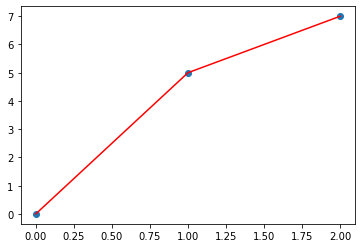

In [21]:
import matplotlib.pyplot as plt
X = [0, 1, 2]
Y = [0, 5, 7]
plt.plot(X, Y,color="red")
print(plt.scatter(X, Y))

## pandas with CSV files 

In [37]:
import pandas as pd
data = pd.read_csv('Position_Salaries.csv')
features = data.iloc[:, 1:-1].values
labels = data.iloc[:, -1].values
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)
sel = VarianceThreshold(threshold=0.1)
sel.fit_transform(features)
sel.get_support()
print(features_test)
features_train

[[3]
 [7]]


array([[ 2],
       [ 5],
       [ 6],
       [10],
       [ 1],
       [ 9],
       [ 4],
       [ 8]], dtype=int64)